In [1]:
import pandas as pd 
import numpy as np 
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import random
from modelling_functions import split_train_validation_data, average_log_loss_score, get_sklearn_model_results_for_races, betting_results_threshold_method, betting_results_top_bsp_method

In [2]:
df = pd.read_csv('ProcessedDatasetExtra.csv', index_col=0)

In [3]:
# Split train and validation data
train_data, validation_data = split_train_validation_data(df, validation_split=0.1)

In [4]:
# Get feature, target and extra information columns from the dataset
info_columns = [
    'DateTime',
    'Track Name',
    'PlaceInt',
    'First Trading Price',
    '15 mins',
    '10 mins',
    '5 mins',
    '3 mins',
    '2 mins',
    '1 min ',
    'Post Time',
    'industry_implied_prob',
    'betfair_implied_prob',
    'industry_implied_prob_norm',
    'betfair_implied_prob_norm'
]

info_columns_set = set(info_columns)

target_column = 'win'

info_columns_set.add(target_column)

feature_columns = list(set(train_data.columns).difference(info_columns_set))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data[feature_columns])

StandardScaler()

In [6]:
#### Logistic Regression ####
#############################

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = train_data[feature_columns]
# X_train = scaler.transform(X_train)

X_validation = validation_data[feature_columns]
# X_validation = scaler.transform(X_validation)

y_train = train_data[target_column]
y_validation = validation_data[target_column]

# Use class_weight='balanced'
log_reg = LogisticRegression(class_weight={True: 3, False: 1}, n_jobs=-1, verbose=1, max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_validation)
y_pred_prob = log_reg.predict_proba(X_validation)

# Evaluation
accuracy = accuracy_score(y_validation, y_pred)
conf_mat = confusion_matrix(y_validation, y_pred)
class_report = classification_report(y_validation, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_report)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          146     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.69773D+04


 This problem is unconstrained.



At iterate   50    f=  5.38839D-01    |proj g|=  1.24240D+02

At iterate  100    f=  5.15756D-01    |proj g|=  4.09569D+02

At iterate  150    f=  5.01122D-01    |proj g|=  9.77319D+01

At iterate  200    f=  4.92277D-01    |proj g|=  1.77077D+01

At iterate  250    f=  4.91794D-01    |proj g|=  7.30579D+01

At iterate  300    f=  4.90036D-01    |proj g|=  5.88990D+01

At iterate  350    f=  4.89838D-01    |proj g|=  4.30659D+00

At iterate  400    f=  4.88869D-01    |proj g|=  6.40613D+00

At iterate  450    f=  4.88166D-01    |proj g|=  6.69545D+01

At iterate  500    f=  4.87663D-01    |proj g|=  1.10630D+01

At iterate  550    f=  4.86839D-01    |proj g|=  2.25847D+00

At iterate  600    f=  4.85027D-01    |proj g|=  2.83001D+01

At iterate  650    f=  4.84101D-01    |proj g|=  2.03427D+00

At iterate  700    f=  4.83891D-01    |proj g|=  2.75608D+00

At iterate  750    f=  4.83781D-01    |proj g|=  1.31663D+01

At iterate  800    f=  4.83770D-01    |proj g|=  4.66574D+00

At iter

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8883552901983689
Confusion Matrix:
 [[40355  1134]
 [ 4027   711]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94     41489
        True       0.39      0.15      0.22      4738

    accuracy                           0.89     46227
   macro avg       0.65      0.56      0.58     46227
weighted avg       0.86      0.89      0.87     46227



In [38]:
#### Random Forest ####
#######################

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train = train_data[feature_columns]
# X_train[feature_columns] = scaler.transform(X_train)

X_validation = validation_data[feature_columns]
# X_validation[feature_columns] = scaler.transform(X_validation)

y_train = train_data[target_column]
y_validation = validation_data[target_column]

# Use class_weight='balanced'
rand_forest = RandomForestClassifier(n_estimators=1000, class_weight={True: 1, False: 2}, n_jobs=-1, verbose=1)
rand_forest.fit(X_train, y_train)

# Predictions
y_pred = rand_forest.predict(X_validation)
y_pred_prob = rand_forest.predict_proba(X_validation)

# Evaluation
accuracy = accuracy_score(y_validation, y_pred)
conf_mat = confusion_matrix(y_validation, y_pred)
class_report = classification_report(y_validation, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_report)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.4min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elaps

Accuracy: 0.8998637160101239
Confusion Matrix:
 [[41130   359]
 [ 4270   468]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.95     41489
        True       0.57      0.10      0.17      4738

    accuracy                           0.90     46227
   macro avg       0.74      0.55      0.56     46227
weighted avg       0.87      0.90      0.87     46227



[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    1.8s finished


In [9]:
race_results = get_sklearn_model_results_for_races(validation_data, feature_columns, log_reg)

In [10]:
average_log_loss_score(race_results, 'model_prediction')

1.863989462857346

In [117]:
average_log_loss_score(race_results, 'betfair_implied_prob')

1.7676594125788276

In [118]:
average_log_loss_score(race_results, 'industry_implied_prob')

1.6228687975464984

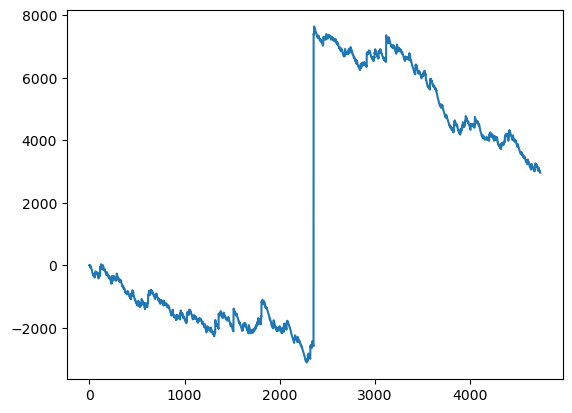

In [31]:
import matplotlib.pyplot as plt 

portfolio, winning_races, winnings, losing_races, losings = betting_results_threshold_method(race_results, implied_prob_column='betfair_implied_prob', threshold=0.1, bet_size=10)

plt.plot(portfolio)
plt.show()

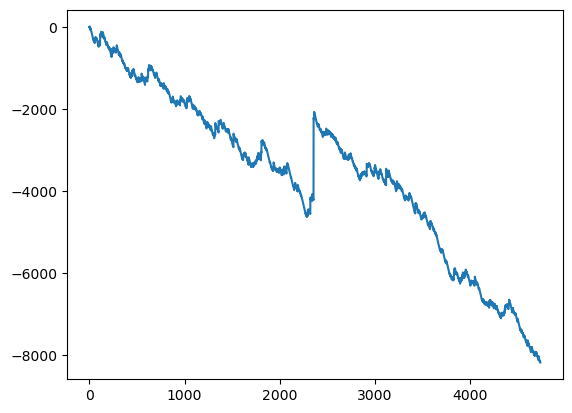

In [32]:
portfolio, winning_races, winnings, losing_races, losings = betting_results_top_bsp_method(race_results, bet_returns_column='industry_implied_prob', implied_prob_column='model_prediction', bet_size=10)

plt.plot(portfolio)
plt.show()